<a href="https://colab.research.google.com/github/dianamelinte23/bulldozer-price-prediction-project/blob/master/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multi-class Dog Breed Classification
This notebook builds an end-to end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog

## 2. Data
The data is from Kaggle's dog breed identification competition:
https://www.kaggle.com/c/dog-breed-identification/data
## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image. 
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data;
* We're dealing with images (unstructured data) so it's best to use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (this images have labels)
* There are around 10,000+ images in the test set (this images have no labels, because we'll predict them )

In [ ]:
# Unzip the uploaded data into Google Drive
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision/"

## Get the workspace ready

In [1]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__ )
print("TF Hub version:", hub.__version__)

#Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.4.1
TF Hub version: 0.11.0
GPU available


## Getting our data ready, turn it into Tensors (numerical representations)

In [2]:
# Checkout the labels 
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     2a26dd719f6ab87fc13eb834d9a9f8e6  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [3]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


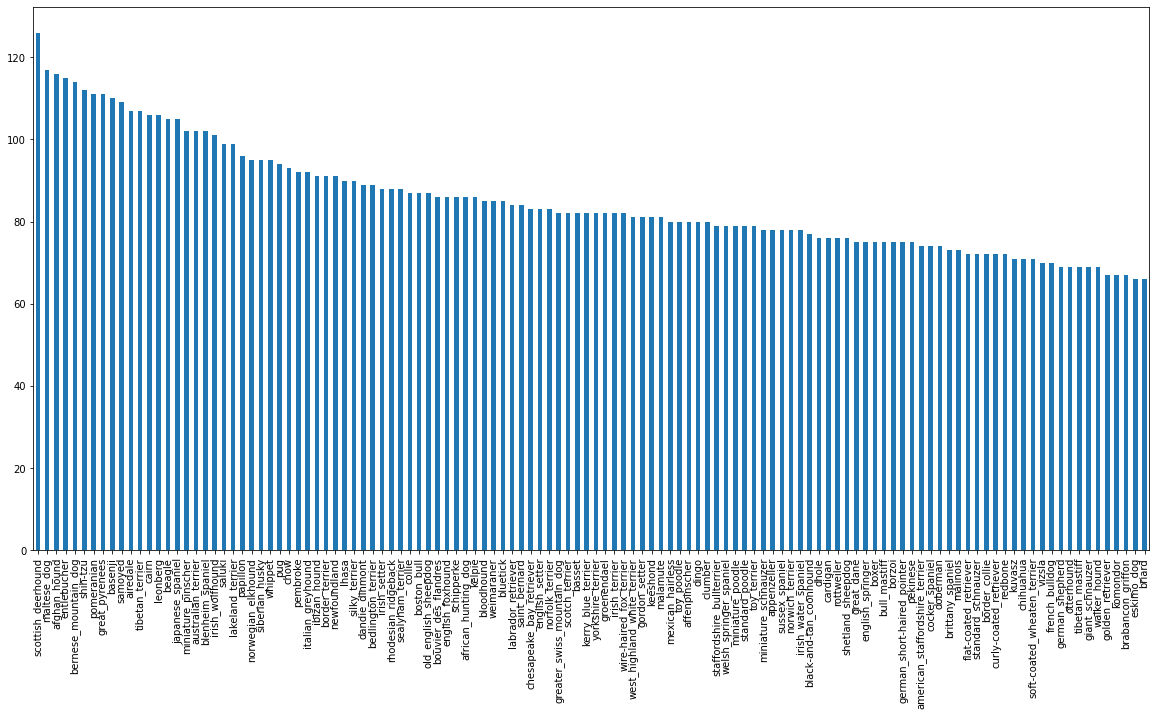

In [6]:
# Images of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [7]:
labels_csv["breed"].value_counts().median()

82.0

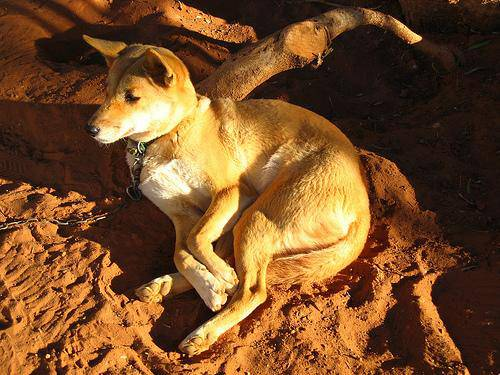

In [10]:
# View images
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

#Getting images and their labels
List of all images and pathnames

In [11]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [17]:
# Create a list of pathnames from image ID's
filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:5]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [18]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train"))==len(filenames):
  print("Filenames match actual amount of files.")
else:
  print("Filenames do not match actual amount of files.")

Filenames match actual amount of files.


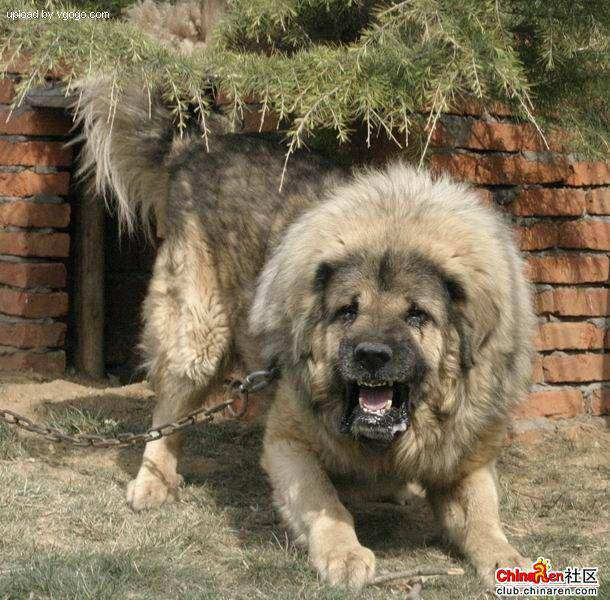

In [24]:
Image(filenames[9000])

In [23]:
labels_csv["breed"][9000]

'tibetan_mastiff'